# Random Numbers and Probability

***

## Calculating Probabilites

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from scipy.stats import uniform

In [2]:
# Dataset
amir_deals = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/amir_deals.csv', index_col = 0)

### Showing Data

In [3]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


### Total Columns and Rows

In [4]:
amir_deals.shape

(178, 5)

In [5]:
amir_deals.dtypes

product       object
client        object
status        object
amount       float64
num_users      int64
dtype: object

In [6]:
amir_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    178 non-null    object 
 1   client     178 non-null    object 
 2   status     178 non-null    object 
 3   amount     178 non-null    float64
 4   num_users  178 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [7]:
amir_deals.isna().any()

product      False
client       False
status       False
amount       False
num_users    False
dtype: bool

---

#### 1. Count the number of deals Amir worked on for each product type and store in counts.

In [4]:
counts = amir_deals['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

#### Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.

In [5]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


#### Set the random seed 24. Take a sample of 5 deals without replacements

In [6]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


#### Take a sample of 5 deals with replacement and save as sample_with_replacement

In [7]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


In [10]:
die = [1, 2, 3, 4, 5, 6]

In [14]:
num = list(range(1, 7))
pr = [0.16667, 0.16667, 0.16667, 0.16667, 0.16667, 0.16667]

dataframe = {
        'number' : num,
        'probability' : pr
    }


die = pd.DataFrame(
        dataframe
    )

print(die)

   number  probability
0       1      0.16667
1       2      0.16667
2       3      0.16667
3       4      0.16667
4       5      0.16667
5       6      0.16667


In [15]:
np.random.seed(100)

# rolling die 10 times with replacement

rolls_10 = die.sample(100, replace = True)
print(rolls_10)

    number  probability
0        1      0.16667
0        1      0.16667
3        4      0.16667
0        1      0.16667
2        3      0.16667
..     ...          ...
2        3      0.16667
2        3      0.16667
0        1      0.16667
2        3      0.16667
2        3      0.16667

[100 rows x 2 columns]


<AxesSubplot:>

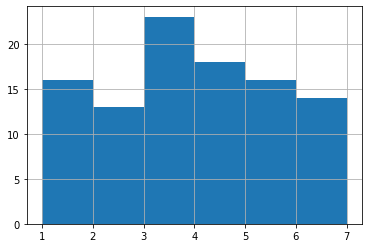

In [16]:
rolls_10['number'].hist(bins = np.linspace(1, 7, 7))

In [17]:
g_id = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
groups = [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]

restaurant = {}
restaurant['group_id'] = g_id
restaurant['group_size'] = groups
restaurant_groups = pd.DataFrame(restaurant)
restaurant_groups.shape

(10, 2)

In [18]:
# Create probability distribution
# P(X = 2) = ( 1/10 + 1/10 + 1/10 + 1/10 + 1/10 + 1/10 )
# P(X = 3) = 1/10
# P(X = 4) = (1/10 + 1/10)
# P(X = 6) = 1/10

size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
print(size_dist)

2    0.6
4    0.2
6    0.1
3    0.1
Name: group_size, dtype: float64


In [19]:
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'probability']

print(size_dist)

   group_size  probability
0           2          0.6
1           4          0.2
2           6          0.1
3           3          0.1


In [20]:
# Find out Expected value
size_dist['size_multiplied_prob'] = size_dist['group_size'] * size_dist['probability']
expected_value = size_dist['size_multiplied_prob'].sum()
expected_value

2.9000000000000004

---

## Continuous Distribution

In [3]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

In [4]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

In [5]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333
